# general imports

In [1]:
import os
import sys
import shutil
import scipy


import numpy as np
import xarray as xr
import pandas as pd
import openpyxl

In [2]:
try:
    %matplotlib widget
except:
    %matplotlib inline
    
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams['figure.constrained_layout.use'] = True

# setting up the example data path

In [3]:
'''
Assuming 000.read_research_data_into_python.data directory exists here with this notebook ('000.read_research_data_into_python.ipynb')
''' 

here = os.getcwd()
example_data_path = '000.read_research_data_into_python.data'

os.listdir('%s/%s'%(here,example_data_path))

['xls', 'plain_text', 'hdf', 'image', 'netcdf', 'yaml', 'npy']

# reading plain text files (txt, dat..)

In [4]:
# navigate into plain_text directory 
os.chdir('%s/%s/%s'%(here,example_data_path,'plain_text'))

# list the contents of directory
os.listdir()

['topas.xy',
 'LaB6-XRD-data-from-XPD-beamline.xy',
 'topas.inp',
 'topas.out',
 'Ni-foil-XAS-data-from-ISS-beamline.dat',
 'topas.dat',
 'Ni-foil-XAS-data-from-QAS-beamline.dat',
 'Ni_calib_20190301-150927_459ff6_0001_mean_tth.chi',
 'two-column-data.txt']

`two-column-data.txt` here is a simple two-column text file.
For someone who doesn't know python, it can be imported into excel

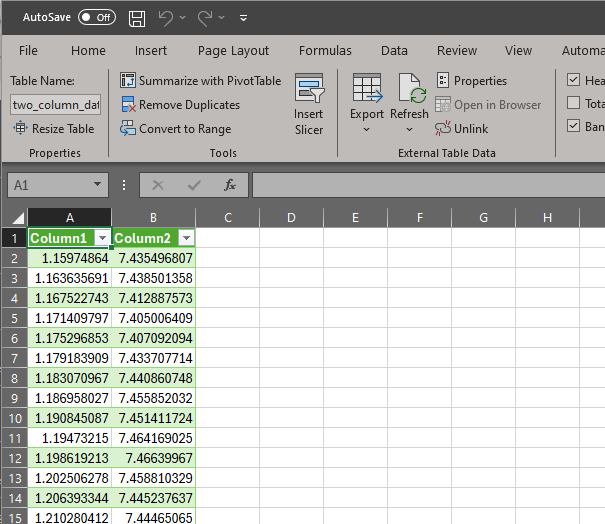

But this is very inefficient and we want "python" way of reading this file.

In python, it is only 3-lines of code to read and plot the contents of this file.

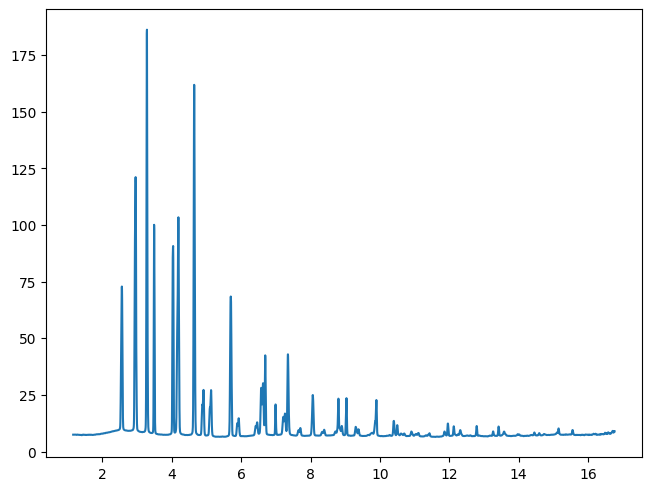

In [5]:
data = np.loadtxt('two-column-data.txt',unpack=True)
plt.figure()
plt.plot(data[0],data[1])

## how about other files here?

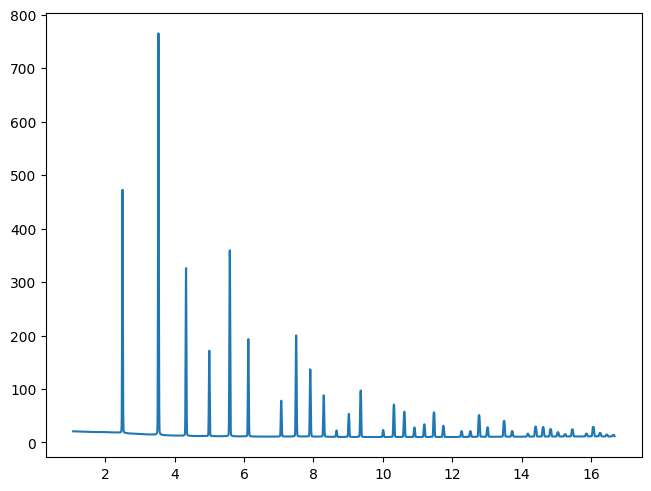

In [6]:
data = np.loadtxt('LaB6-XRD-data-from-XPD-beamline.xy',unpack=True)
plt.figure()
plt.plot(data[0],data[1])

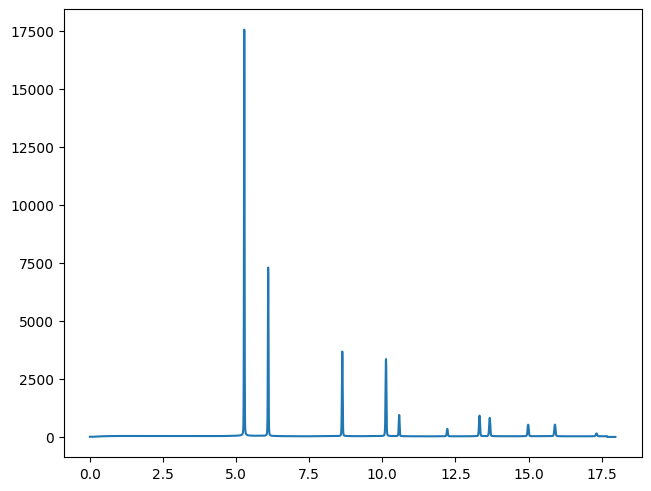

In [7]:
data = np.loadtxt('Ni_calib_20190301-150927_459ff6_0001_mean_tth.chi',unpack=True,skiprows=7)
plt.figure()
plt.plot(data[0],data[1])

Text(0.5, 1.0, 'aux4')

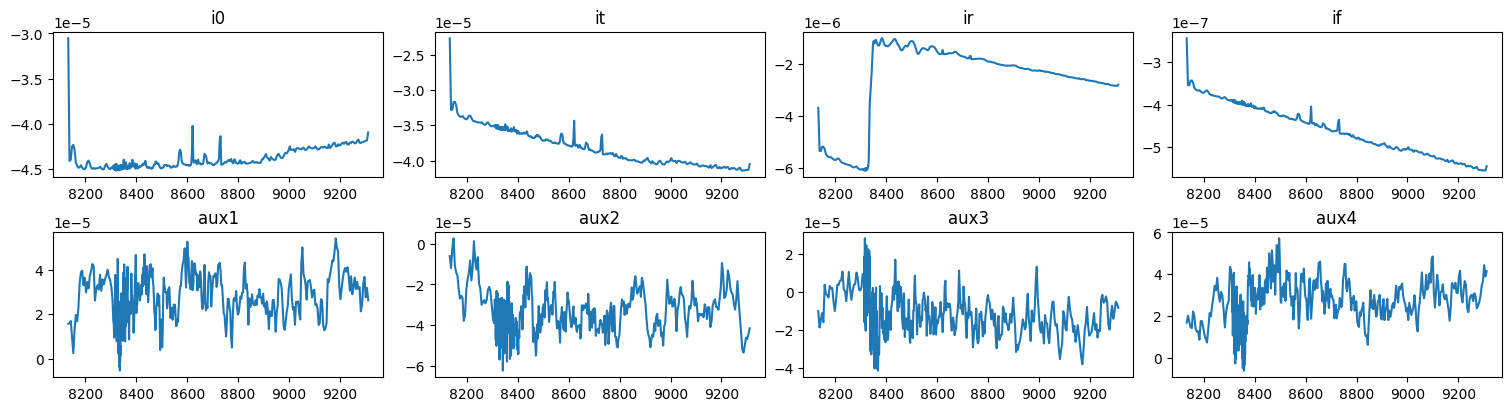

In [8]:
#plots for ISS
data = np.loadtxt('Ni-foil-XAS-data-from-ISS-beamline.dat',unpack=True)
fig, axs = plt.subplots(2, 4, figsize=(15,4))
axs[0, 0].plot(data[0],data[1])
axs[0, 0].set_title('i0')
axs[0, 1].plot(data[0],data[2])
axs[0, 1].set_title('it')
axs[0, 2].plot(data[0],data[3])
axs[0, 2].set_title('ir')
axs[0, 3].plot(data[0],data[4])
axs[0, 3].set_title('if')
axs[1, 0].plot(data[0],data[5])
axs[1, 0].set_title('aux1')
axs[1, 1].plot(data[0],data[6])
axs[1, 1].set_title('aux2')
axs[1, 2].plot(data[0],data[7])
axs[1, 2].set_title('aux3')
axs[1, 3].plot(data[0],data[8])
axs[1, 3].set_title('aux4')

Text(0.5, 1.0, 'adc8')

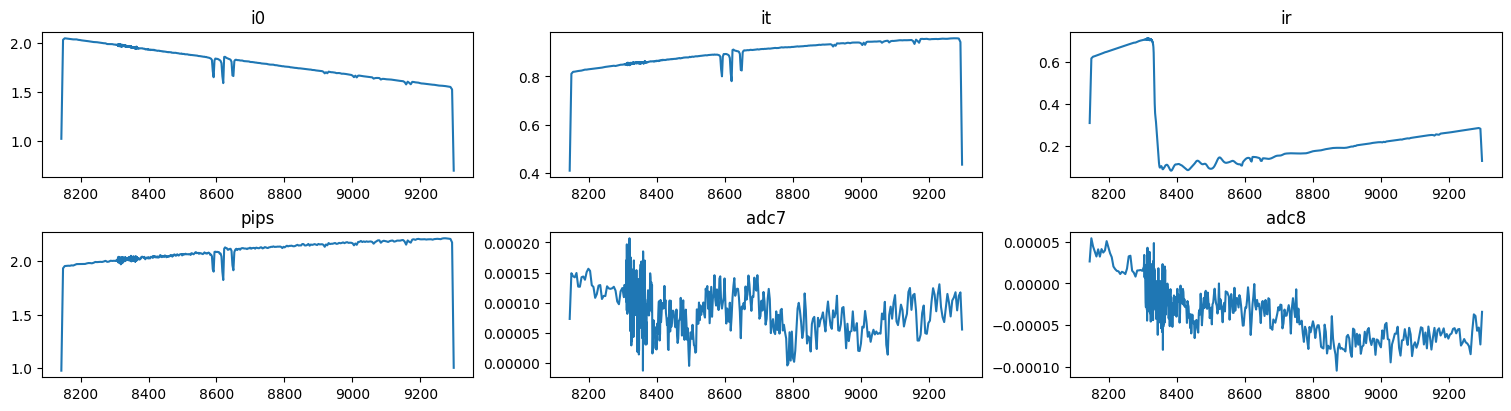

In [9]:
#plots for QAS
data = np.loadtxt('Ni-foil-XAS-data-from-QAS-beamline.dat',unpack=True)
fig, axs = plt.subplots(2, 3, figsize=(15,4))
axs[0, 0].plot(data[0],data[1])
axs[0, 0].set_title('i0')
axs[0, 1].plot(data[0],data[2])
axs[0, 1].set_title('it')
axs[0, 2].plot(data[0],data[3])
axs[0, 2].set_title('ir')
axs[1, 0].plot(data[0],data[4])
axs[1, 0].set_title('pips')
axs[1, 1].plot(data[0],data[5])
axs[1, 1].set_title('adc7')
axs[1, 2].plot(data[0],data[6])
axs[1, 2].set_title('adc8')

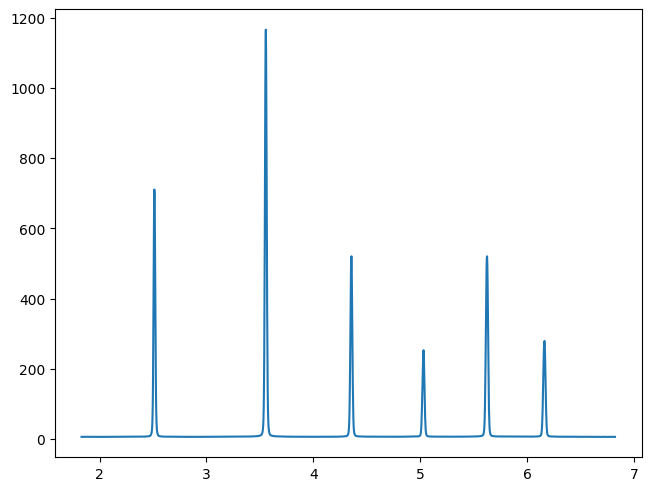

In [10]:
data = np.loadtxt('topas.xy',unpack=True)
plt.figure()
plt.plot(data[0],data[1])

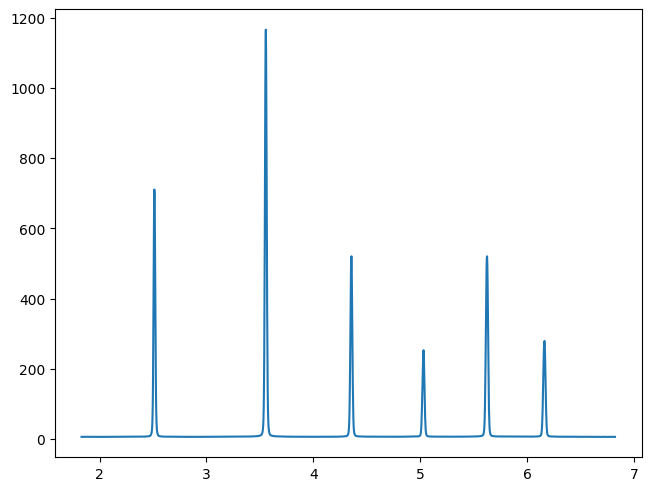

In [11]:
data = np.loadtxt('topas.xy',unpack=True)
plt.figure()
plt.plot(data[0],data[1])

# reading xls files into python

In [12]:
#navigate to xls directory
os.chdir('%s/%s/%s'%(here,example_data_path,'xls'))
print('%s/%s/%s'%(here,example_data_path,'xls'))
os.listdir()

/Users/kevinmorell/repositories/pySULI/notebooks/000.read_research_data_into_python.data/xls


['25KI-LiCl-KCl_25oC.xlsx']

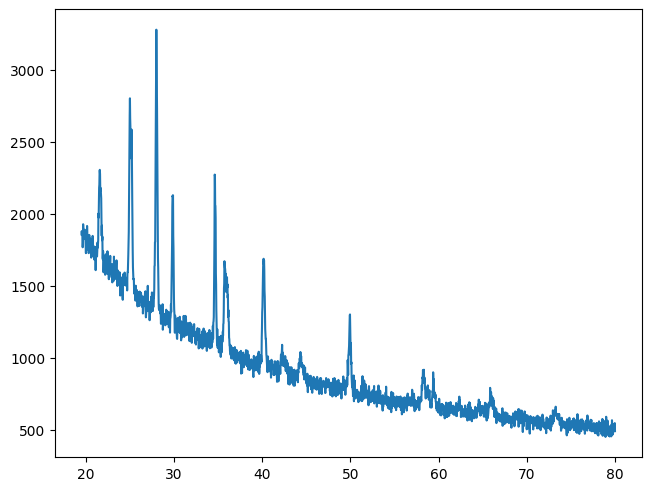

In [13]:
xls = pd.ExcelFile(r'25KI-LiCl-KCl_25oC.xlsx') #read file
sheetX = xls.parse(0) #read sheet 1
plt.plot(sheetX['Angles'],sheetX['Intensities'])

# reading image files into python

In [16]:
# navigate into image folder 
os.chdir('%s/%s/%s'%(here,example_data_path,'image'))

# list the contents of directory
os.listdir()

['NIST-LaB6.tiff', 'NIST-LaB6-CeO2-mix.tiff', 'NIST-LaB6.png']

Text(0.5, 1.0, 'image 3')

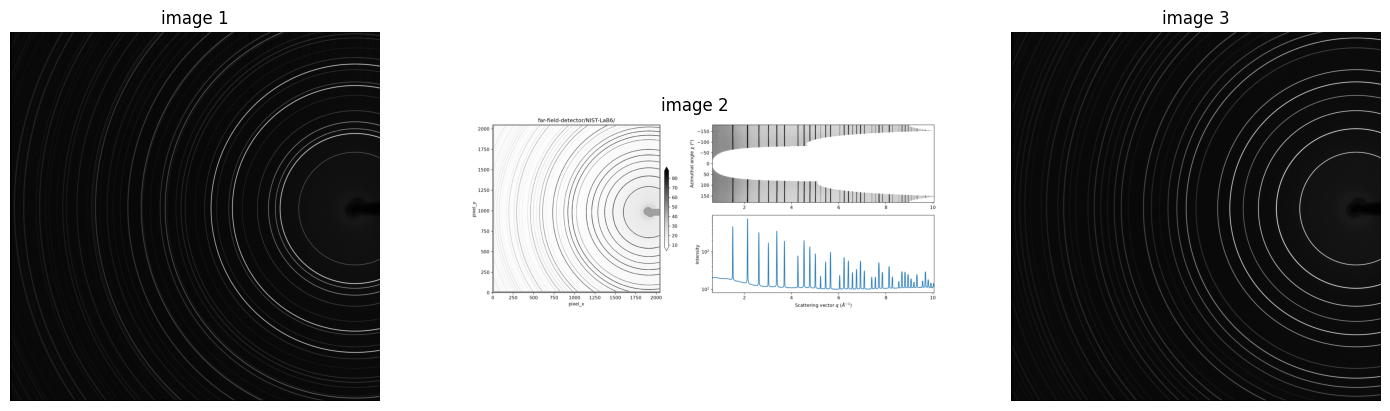

In [30]:
#open images and import image module
from PIL import Image
im1 = Image.open('NIST-LaB6-CeO2-mix.tiff')
im2 = Image.open('NIST-LaB6.png')
im3 = Image.open('NIST-LaB6.tiff')
#plot images without axes
f, axs = plt.subplots(1,3, figsize=(15,4))
axs[0].imshow(im1)
axs[0].set_axis_off()
axs[0].set_title('image 1')
axs[1].imshow(im2)
axs[1].set_axis_off()
axs[1].set_title('image 2')
axs[2].imshow(im3)
axs[2].set_axis_off()
axs[2].set_title('image 3')

# reading xarray netCDF files into python

# reading hdf files into python

# reading numpy files (npy, npz) into python

# reading yaml into python